# Punto 1

In [20]:
%matplotlib inline
import pandas as pd
reviews = pd.read_csv("winemag-data_first150k.csv")
reviews.head(3)

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


# Punto 2

<Axes: xlabel='province'>

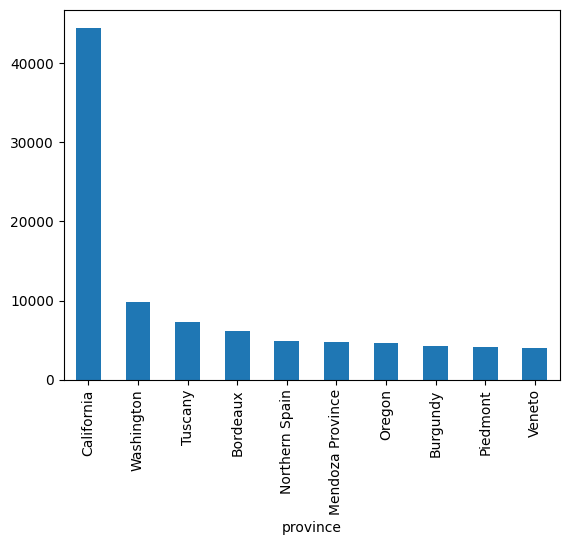

In [21]:
reviews['province'].value_counts().head(10).plot.bar()

# Punto 3

<Axes: xlabel='province'>

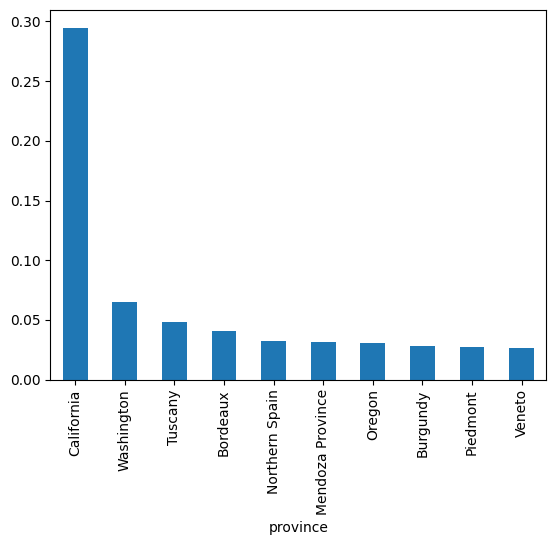

In [22]:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()

# Punto 4

<Axes: xlabel='points'>

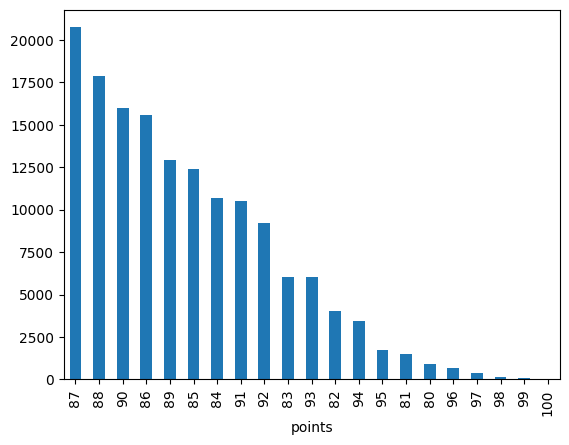

In [23]:
reviews['points'].value_counts().plot.bar()

In [32]:
import matplotlib.pyplot as plt

grouped_rew = reviews.groupby(['points']).size().sort_values(ignore_index=True)
grouped_rew
#plt.bar(reviews['points'].value_counts().index, reviews['points'].value_counts())

,0
0,24
1,50
2,131
3,365
4,695
5,898
6,1502
7,1716
8,3462
9,4041


In [27]:
grouped_reviewes = reviews.groupby(['points']).size().sort_values()
grouped_reviewes

,0
points,
100,24
99,50
98,131
97,365
96,695
80,898
81,1502
95,1716
94,3462


In [28]:
grouped_reviewes.reset_index()

,points,0
0,100,24
1,99,50
2,98,131
3,97,365
4,96,695
5,80,898
6,81,1502
7,95,1716
8,94,3462
9,82,4041


In [29]:
grouped_reviewes

,0
points,
100,24
99,50
98,131
97,365
96,695
80,898
81,1502
95,1716
94,3462


<BarContainer object of 21 artists>

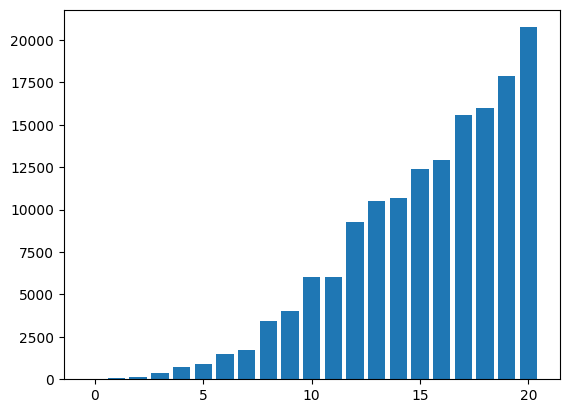

In [33]:
plt.bar(grouped_rew.index, grouped_rew.values)

# Punto 5

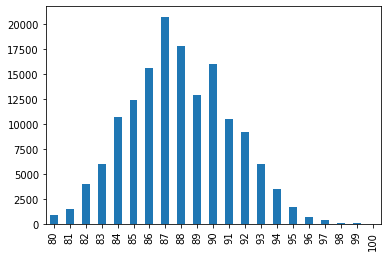

In [ ]:
reviews['points'].value_counts().sort_index().plot.bar()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


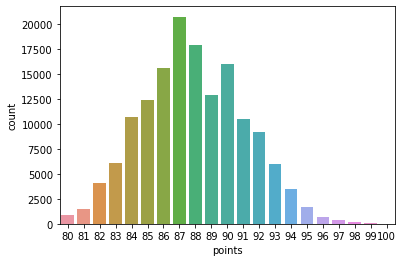

In [ ]:
import seaborn as sns
sns.countplot(reviews['points'])

# Punto 6

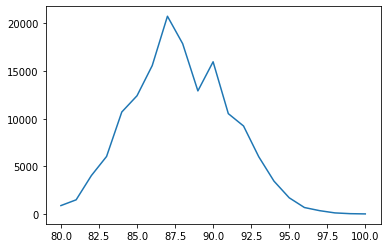

In [ ]:
reviews['points'].value_counts().sort_index().plot.line()

# Punto 7

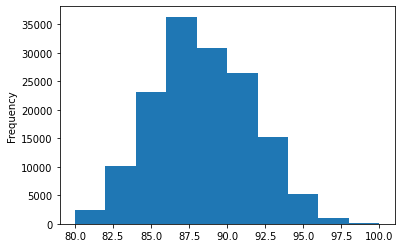

In [ ]:
reviews['points'].plot.hist()

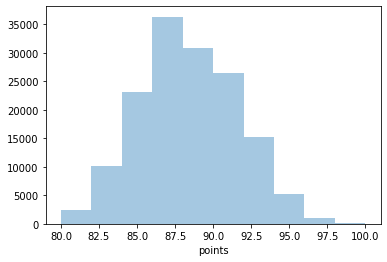

In [ ]:
sns.distplot(reviews['points'], bins=10, kde=False)

# Punto 8

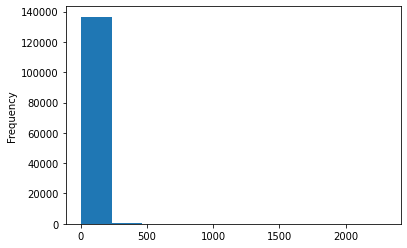

In [ ]:
reviews['price'].plot.hist()

# Punto 9

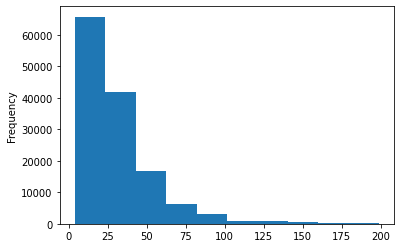

In [ ]:
reviews[reviews['price'] < 200]['price'].plot.hist()

# Punto 10

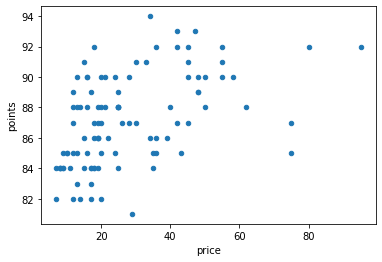

In [ ]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

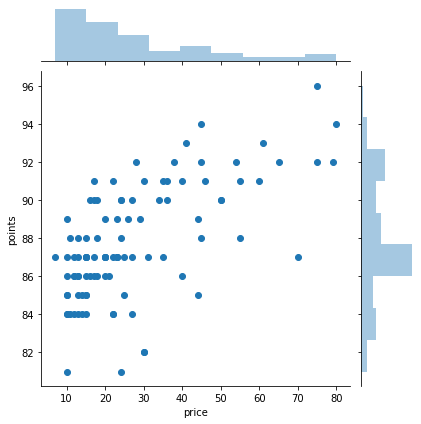

In [ ]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100].sample(100))

# Punto 11

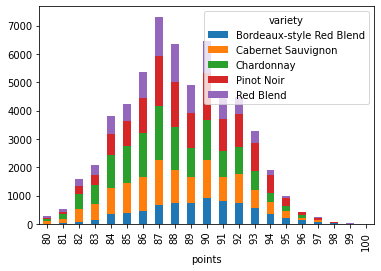

In [ ]:
reviews[reviews["variety"].isin(["Bordeaux-style Red Blend", "Cabernet Sauvignon", "Chardonnay", "Pinot Noir", "Red Blend"])].groupby(["variety", "points"]).size().unstack(level=0).plot.bar(stacked=True)

# Punto 12

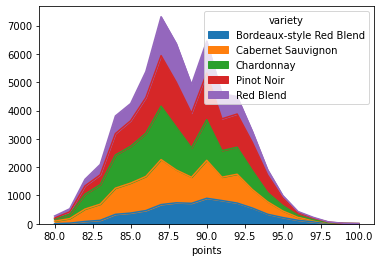

In [ ]:
reviews[reviews["variety"].isin(["Bordeaux-style Red Blend", "Cabernet Sauvignon", "Chardonnay", "Pinot Noir", "Red Blend"])].groupby(["variety", "points"]).size().unstack(level=0).plot.area()

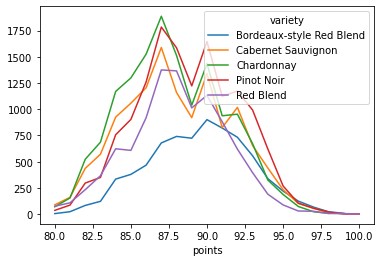

In [ ]:
reviews[reviews["variety"].isin(["Bordeaux-style Red Blend", "Cabernet Sauvignon", "Chardonnay", "Pinot Noir", "Red Blend"])].groupby(["variety", "points"]).size().unstack(level=0).plot.line()

# Punto 13

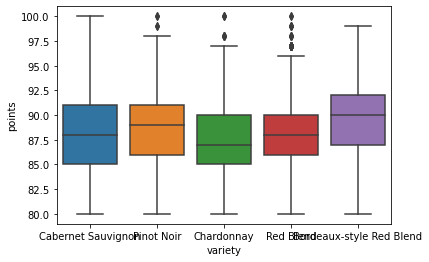

In [ ]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)

# Punto 14

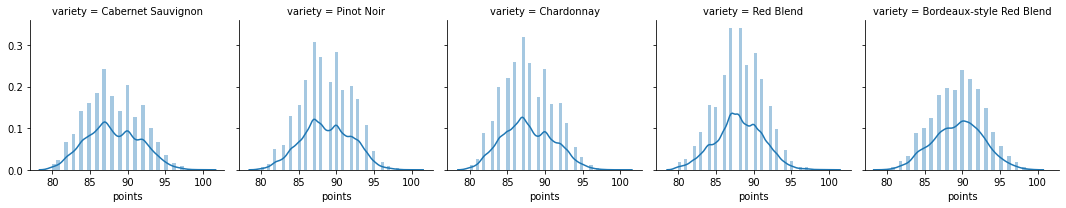

In [ ]:
g = sns.FacetGrid(df, col="variety")
g.map(sns.distplot, "points")

# Punto 15

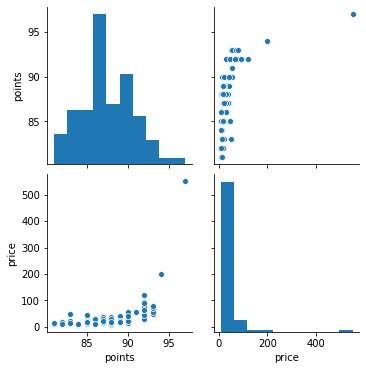

In [ ]:
sns.pairplot(reviews[["points", "price"]].sample(100).dropna())

# Punto 16

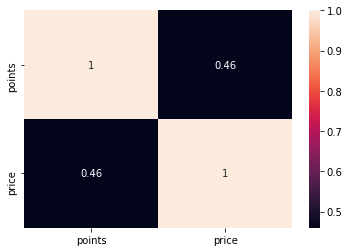

In [ ]:
c = reviews[["points", "price"]].corr()
sns.heatmap(c, annot=True)

Conclusioni:
- i bar plot sono grafici efficaci per rappresentare variabili categoriche nominali (ovvero con pochi valori)
- i line chart sono grafici efficaci per rappresentare variabili categoriche ordinali (ovvero con un elevato numero di valori -> 100)
- gli istogrammi sono una tipologia particolare di grafici a barre nei quali i dati vengono suddivisi in intervalli e per ognuno di essi si contano i dati che vi ricadono all'interno, visualizzandone il valore con una barra. Ogni barra rappresenta quindi un range di valori.
- gli istogrammi non sono molto adatti con frequenze molto sbilanciate

